<img style="float: left;;" src='Figures/iteso.jpg' width="100" height="200"/></a>

# <center> <font color= #000047> Integración Numérica Montecarlo </font> </center>



# Integración numérica Montecarlo

**Referencia:**
- https://ocw.mit.edu/courses/mechanical-engineering/2-086-numerical-computation-for-mechanical-engineers-fall-2014/nutshells-guis/MIT2_086F14_Monte_Carlo.pdf
- http://ta.twi.tudelft.nl/mf/users/oosterle/oosterlee/lec8-hit-2009.pdf
- Sauer, Timothy. *Análisis Numérico*, 2da. Edición, ISBN: 978-607-32-2059-0.

<img style="float: center; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/f/f2/Integral_as_region_under_curve.svg" width="300px" height="100px" />



## Motivación

En análisis de ingeniería, normalmente debemos evaluar integrales definidas sobre un dominio complejo o en un espacio de dimensión alta.

> Por ejemplo, podríamos querer calcular:
> - la deflexión en una viga de geometría complicada, 
> - el volumen de una parte tridimensional de una aeronave,
> - o evaluar alguna medida de rendimiento (rentabilidad) en algún proceso que sea expresada como una integral de alguna función sin antiderivada primitiva (que se pueda expresar en términos de funciones elementales).

A la mano tenemos herramientas de integración analítica cuando tanto el espacio de integración como la función a integrar son simples. Cuando la función a integrar es difícil (incluso, imposible) de integrar podemos aún recurrir a métodos numéricos de integración. 

> Desafortunadamente, los métodos determinísiticos de integración fallan cuando:
> - la región es demasiado compleja para discretizarla,
> - o la función a integrar es demasiado irregular,
> - o la convergencia es demasiado lenta debido a la alta dimensionalidad del espacio de integración (ver [Maldición de la dimensionalidad](https://es.wikipedia.org/wiki/Maldici%C3%B3n_de_la_dimensi%C3%B3n)).

Por eso en esta clase veremos una *técnica alternativa de integración numérica*: **Integración Montecarlo**.

### Ejemplos de funciones sin antiderivada primitiva.

De su curso de cálculo integral seguro recordarán (o estarán viendo) que existen funciones cuya integral no tiene primitiva. Es decir, **que no podemos encontrar una función que se pueda expresar en forma de funciones elementales cuya derivada sea tal función**.

Esto **no significa que dicha función no se pueda integrar**, ya que sabemos que cualquier función continua es integrable (y la mayoría de funciones que vemos a ese nivel, lo son). Lo que ocurre es que no podemos expresar dicha integral de una forma sencilla (por ejemplo, en función de exponenciales, senos, cosenos, logaritmos...).

Algunas integrales que no son elementales son:
- $\int e^{p(x)}\text{d}x$, donde $p(x)$ es un polinomio de grado mayor o igual a dos.
- $\int \frac{1}{log(x)}\text{d}x$.
- $\int \frac{sin(x)}{x}\text{d}x$

**Referencia:**
- https://www.gaussianos.com/funciones-sin-primitiva-elemental/

### Ejemplos de regiones difíciles de discretizar.

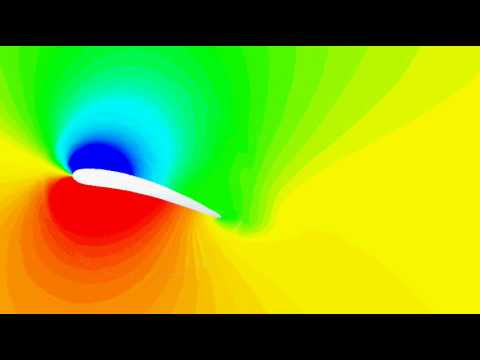

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('Ti5zUD08w5s')

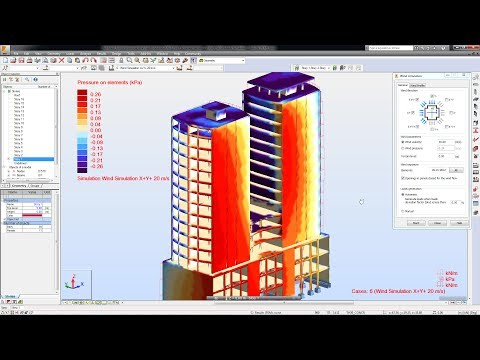

In [2]:
YouTubeVideo('jmsFC0mNayM')

___
## Integración Montecarlo tipo 1
Se basa en la definición de *valor promedio* de una función y en el *valor esperado* de una *variable aleatoria uniforme*.

Presentamos esto mediante un ejemplo.

**Ejemplo.** Aproxime el área bajo la curva $y=x^2$ en el intervalo $\left[0,1\right]$.

Veamos primero cómo luce dicha área.

In [3]:
# Importamos librería para graficar y numpy
import numpy as np
from matplotlib import pyplot as plt


In [4]:
# Función f(x)=x**2
def f(x):
    return x**2


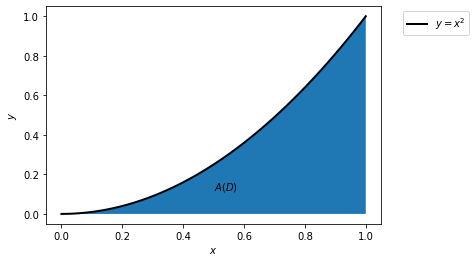

In [5]:
# Dibujamos la región
# Generamos los puntos de la curva y=x^2
x=np.linspace(0,1)
y = f(x)

#dibujar la curva
plt.plot(x,y,'k',lw=2, label='$y=x^2$')
#Rellenar la región 
plt.fill_between(x,y)
plt.text(0.5,0.125,'$A(D)$')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend(loc='upper left', bbox_to_anchor=(1.05,1))

Entonces, lo que queremos es aproximar el área de la región $\mathcal{D}$. Llamaremos esta área $A(\mathcal{D})$.

De cálculo integral, sabemos que

$$A(\mathcal{D})=\int_{0}^{1}y\text{d}x=\int_{0}^{1}x^2\text{d}x$$.

Por *definición*, el **valor promedio** de una función $f:\left[a,b\right]\to\mathbb{R}$ en un intervalo $\left[a,b\right]$ es

$$\frac{1}{b-a}\int_{a}^{b}f(x)\text{d}x.$$

Entonces, el área bajo la curva $y=x^2$ es exactamente el valor promedio de $f(x)=x^2$ en $\left[0,1\right]$. Este valor promedio puede aproximarse mediante el promedio de los valores de la función en puntos aleatorios **uniformemente distribuidos** en el intervalo $\left[0,1\right]$. Es decir,

$$A(\mathcal{D})=\int_{0}^{1}x^2\text{d}x=\int_{0}^{1}f(x)\text{d}x\approx \frac{1}{N}\sum_{i=1}^{N}f(u_i)=\frac{1}{N}\sum_{i=1}^{N}u_i^2$$,

donde $u_i$ son realizaciones de la variable aleatoria $U\sim\mathcal{U}\left[0,1\right]$ ($U$ distribuye uniformemente en el intervalo $\left[0,1\right]$).

**¿Cómo construit vectores de números aleatorios?**
- Ver [numpy.random](https://docs.scipy.org/doc/numpy-1.10.0/reference/routines.random.html).

En este caso necesitamos $N$ números aleatorios uniformemente distribuidos...

In [6]:
# Número de puntos par aproximar
N=100000
#Secuencia de N números aleatorios entre 0 y 1
u = np.random.uniform(0,1,N)
# Aproximación del Area
A_D = np.sum((u**2))/N
A_D

0.3336502075815951

En este caso, la integral se puede hacer fácilmente. Comparemos el resultado con el valor real:

$$A(\mathcal{D})=\int_{0}^{1}x^2\text{d}x=\left.\frac{x^3}{3}\right|_{x=0}^{x=1}=\frac{1}{3}$$

Hagamos una tabla viendo:
- cantidad de terminos
- valor de la aproximacion
- error relativo

In [7]:
# Importamos pandas
import pandas as pd

In [8]:
# Valor exacto del area AD
AD= 1/3

# Cantidades de términos 10, 100, ..., 10**7 (numpy.logspace)
n_terminos = np.logspace(1,7,7).astype(int)

# Crear un DataFrame cuyo índice sea la cantidad de términos
# y sus columnas sean el valor aproximado de la integral y
# el error absoluto

tabla = pd.DataFrame(columns=['Aprox','Error'], index = n_terminos)

for n in n_terminos:
    u = np.random.uniform(0,1,n)
    tabla.loc[n,'Aprox'] = (u**2).mean()
    tabla.loc[n, 'Error'] = np.abs(AD - tabla.loc[n,'Aprox'])

tabla

,Aprox,Error
10,0.385668,0.052335
100,0.322684,0.01065
1000,0.333821,0.000487
10000,0.329469,0.003864
100000,0.33402,0.000687
1000000,0.333336,0.000002
10000000,0.333461,0.000128


Ver que los resultados son distintos cada vez (¿porqué?). Sin embargo, se aproximan más o menos en la misma medida.

**Aproximación de integrales en intervalos distintos a $\left[0,1\right]$.**

Sin embargo, no todas las integrales que hacemos son en el intervalo $\left[0,1\right]$. En general, podemos integrar cualquier función continua en el intervalo $\left[a,b\right]$, donde $a,b\in\mathbb{R}$ con $a<b$.

Sea $f:\left[a,b\right]\to\mathbb{R}$ una función continua en el intervalo $\left(a,b\right)$ (por lo tanto es integrable endicho intervalo). Queremos resolver:

$$\int_{a}^{b}f(x)\text{d}x.$$

¿Cómo podemos usar la idea del valor promedio para resolver esto?

El valor promedio de $f$ en $\left[a,b\right]$ es:

$$\frac{1}{b-a}\int_{a}^{b}f(x)\text{d}x.$$

Este valor promedio puede aproximarse mediante el promedio de $N$ valores de la función en puntos aleatorios **uniformemente distribuidos** en el intervalo $\left[a,b\right]$. Es decir,

$$\frac{1}{b-a}\int_{a}^{b}f(x)\text{d}x\approx \frac{1}{N}\sum_{i=1}^{N}f(u_i)$$,

donde $u_i$ son realizaciones de la variable aleatoria $U\sim\mathcal{U}\left[a,b\right]$ ($U$ distribuye uniformemente en el intervalo $\left[a,b\right]$).

Finalmente, la aproximación montecarlo tipo 1 con $N$ términos es 

$$\int_{a}^{b}f(x)\text{d}x\approx \frac{b-a}{N}\sum_{i=1}^{N}f(u_i)$$,

Escribamos una función que tenga como entradas:
- la función a integrar $f$,
- los límites de integración $a$ y $b$, y
- el número de términos que se usará en la aproximación $N$,

y que devuelva la aproximación montecarlo tipo 1 de la integral $\int_{a}^{b}f(x)\text{d}x$.

In [9]:
# Escribir la función acá
def montecarlo_tipo1(f,a,b,N):
    u = np.random.uniform(a,b,N)
    return (b-a)/N * f(u).sum()


In [10]:
def f1(x):
    return x**2
    
montecarlo_tipo1(f=f1,a=0,b=5,N=10000)

42.01677592631416

**Actividad.** Utilizar la anterior función para realizar las siguientes integrales. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y cuyas columnas correspondan a las funciones.
- $\int_{2}^{2.1} e^{x^2}\text{d}x$.
- $\int_{2}^{2.1} \frac{1}{log(x)}\text{d}x$.
- $\int_{2}^{2.1} \frac{sin(x)}{x}\text{d}x$.

In [25]:
# 1.-
def f1(x):
    return np.exp(x**2)
# 2.- 
def f2(x):
    return 1/np.log(x)
# 3.- 
def f3(x):
    return np.sin(x)/x


In [26]:
AD_1 = montecarlo_tipo1(f=f1,a=2,b=2.1,N=10)
AD_1

6.459257166597755

In [29]:
n_terminos = np.logspace(1,7,7).astype(int)

tabla_1 = pd.DataFrame(columns=['Aprox','Error'], index = n_terminos)
AD = 6.7378
for n in n_terminos:
    u = np.random.uniform(0,1,n)
    tabla_1.loc[n,'Aprox'] = montecarlo_tipo1(f=f1,a=2,b=2.1,N=n)
    tabla_1.loc[n, 'Error'] = np.abs(AD - tabla_1.loc[n,'Aprox'])
    
tabla_1

,Aprox,Error
10,6.792067,0.054267
100,6.808929,0.071129
1000,6.732293,0.005507
10000,6.739086,0.001286
100000,6.737803,0.000003
1000000,6.736958,0.000842
10000000,6.737802,0.000002


In [30]:
def tabla_error(AD, f,a,b, n_terminos):
    tabla_1 = pd.DataFrame(columns=['Aprox','Error'], index = n_terminos)
    for n in n_terminos:
        u = np.random.uniform(0,1,n)
        tabla_1.loc[n,'Aprox'] = montecarlo_tipo1(f=f1,a=a,b=b,N=n)
        tabla_1.loc[n, 'Error'] = np.abs(AD - tabla_1.loc[n,'Aprox'])

    return tabla_1

In [31]:
n_terminos = np.logspace(1,7,7).astype(int)
AD = 6.7378
tabla_error(AD, f1,2,2.1, n_terminos)

,Aprox,Error
10,6.629595,0.108205
100,6.634138,0.103662
1000,6.78073,0.04293
10000,6.730838,0.006962
100000,6.734625,0.003175
1000000,6.73677,0.00103
10000000,6.737756,0.000044


In [27]:
AD_2 = montecarlo_tipo1(f=f2,a=2,b=2.1,N=10)
AD_2

0.13896668993295574

In [28]:
AD_3 = montecarlo_tipo1(f=f3,a=2,b=2.1,N=10)
AD_3

0.04383016884579035

In [11]:
# Resolver
# 1. Definir las funciones que vamos a integrar


# 2. Definimos los limites de integracion


# 3. Definimos cantidades de terminos



___
## Integración Montecarlo tipo 2
Con la integración montecarlo tipo 1 pudimos aproximar integrales de funciones continuas de una variable en un intervalo dado. En realidad este mismo análisis se puede ampliar para aproximar integrales definidas de funciones continuas de varias variables (integrales sobre áreas, volúmenes e hipervolúmenes) dado que la noción de valor promedio de una función se extiende a cualquier dimensión.

**Este es en realidad el caso interesante, pues las integrales de funciones complicadas también se pueden aproximar por métodos numéricos clásicos, pero cuando la dimensión aumenta es cuando montecarlo se vuelve una herramienta relevante. Dado que no lo veremos en clase por la limitación de que la mayoría no han visto cálculo en varias variables, este tema puede ser elegido como proyecto de módulo, donde se exploraría también como mejorar la aproximación de integrales montecarlo.**

Como vimos en el ejemplo (y como debe ser claro de su curso de cálculo integral) una de las aplicaciones más importantes de la integración es hallar áreas. Y no solo el área bajo una curva, sino áreas entre curvas y áreas de regiones más complicadas.

Antes de ver la integración montecarlo tipo 2, ¿cómo podemos usar la integración montecarlo tipo 1 para aproximar el área entre curvas?

**Ejemplo.** Aproxime el área entre las curvas $y=x$, y $y=x^2$ en el intervalo $\left[0,1\right]$.

Veamos primero cómo luce dicha área.

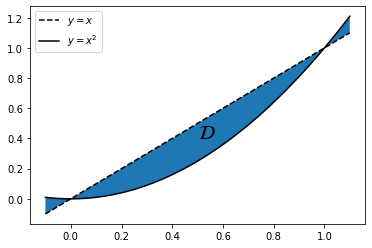

In [32]:
x = np.linspace(-0.1,1.1)
y = x**2

plt.plot(x,x,'k--',label='$y=x$')
plt.plot(x,y,'k',label='$y=x^2$')
plt.fill_between(x,x,y)
plt.text(0.5,0.4,'$\mathcal{D}$', fontsize=20)
plt.legend(loc='best')
plt.show()

De cálculo integral, sabemos que

$$A(\mathcal{D})=\int_{0}^{1}(x-x^2)\text{d}x.$$

Entonces...

In [33]:
# Usar la funcion montecarlo1
N=10**7
A_D = 1/2 - 1/3
A_D_aprox = montecarlo_tipo1(f= lambda x: x - x**2, a=0,b=1,N=N)
A_D,A_D_aprox

(0.16666666666666669, 0.1666498201864711)

In [35]:
# Función explícita
def funcion_exp(x):
    return x**2

funcion = lambda x: x**2

In [14]:
# Función implícita (anónima)


In [36]:
funcion_exp(2)

4

In [37]:
funcion(2)

4

De modo que si la región se puede describir fácilmente, entonces podemos aproximar la integral sin problema.

Pero, ¿qué pasa si la geometría de la región no se puede describir fácilmente?

Como en el caso anterior, motivaremos el método con un caso conocido. Vamos a aproximar el valor de $\pi$ usando el área de un círculo unitario.

Dibujemos el círculo unitario en la región $\mathcal{R}=\left[-1,1\right]\times\left[-1,1\right]$.

In [39]:
# Parte superior de circunferencia centrada en el origen
def circ_arriba(x,R):
    return np.sqrt(R**2 - x**2)
# Parte inferior de circunferencia centrada en el origen
def circ_abajo(x,R):
    return - np.sqrt(R**2 - x**2)


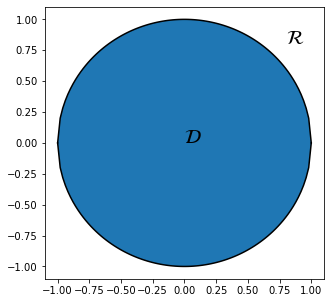

In [40]:
x = np.linspace(-1,1,100)
y1=circ_arriba(x,1)
y2=circ_abajo(x,1)

plt.figure(figsize=(5,5))
plt.plot(x,y1,'k')
plt.plot(x,y2,'k')
plt.fill_between(x,y1,y2)
plt.text(0,0,'$\mathcal{D}$',fontsize=20)
plt.text(0.8,0.8,'$\mathcal{R}$',fontsize=20)
plt.show()

Si aproximamos $A(\mathcal{D})$ aproximamos el valor de $\pi$, pues el área del círculo unitario es:

$$A(\mathcal{D})=\pi(1)^2=\pi.$$

Por otra parte es claro que el área de la región $\mathcal{R}=\left[-1,1\right]\times\left[-1,1\right]$ es

$$A(\mathcal{R})=4.$$

Ahora, haremos uso de nuestro generador de números aleatorios. Supongamos que escogemos un punto aleatorio en la región $\mathcal{R}=\left[-1,1\right]\times\left[-1,1\right]$. Describimos este punto como $(X,Y)$ para $X$ e $Y$ variables aleatorias uniformes sobre el intervalo $\left[-1,1\right]$.

¿Cómo generamos puntos aleatorios en un rectángulo?

In [52]:
# Se generan variables aleatorias para cada dimensión
N = 10000
x=np.random.uniform(low=-1,high=1, size=N)
y=np.random.uniform(low=-1,high=1, size=N)


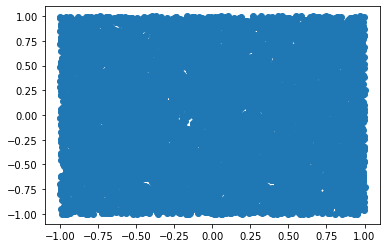

In [53]:
# Gráfica de los disparos aleatorios
plt.scatter(x,y)

La probabilidad de que el punto $(X,Y)$ esté en el círculo unitario $\mathcal{D}$ es

$$P((X,Y)\in\mathcal{D})=\frac{A(\mathcal{D})}{A(\mathcal{R})}=\frac{\pi}{4}.$$

Luego, definimos una variable aleatoria de Bernoulli $B$ de manera que

$$B=\left\lbrace\begin{array}{ccc}0 & \text{si} & (X,Y)\notin\mathcal{D}\\1 & \text{si} & (X,Y)\in\mathcal{D} \end{array}\right.=\left\lbrace\begin{array}{ccc}0 & \text{si} & X^2+Y^2>1\\1 & \text{si} & X^2+Y^2\leq 1 \end{array}\right..$$

Entonces, el valor esperado de la variable aleatoria $B$ es

$$E\left[B\right]=\theta=P((X,Y)\in\mathcal{D})=\frac{A(\mathcal{D})}{A(\mathcal{R})}.$$

De lo anterior, una estimación de theta se puede obtener como

$$\theta=\frac{A(\mathcal{D})}{A(\mathcal{R})}\approx \frac{1}{N}\sum_{i=1}^{N}b_i,$$

donde 

$$b_i=\left\lbrace\begin{array}{ccc}0 & \text{si} & x_i^2+y_i^2>1\\1 & \text{si} & x_i^2+y_i^2\leq 1 \end{array}\right.$$

son realizaciones de la variable aleatoria $B$, que a su vez es producto de las realizaciones $x_i$ e $y_i$ de las variables aleatorias $X$ e $Y$, respectivamente.

Finalmente, la aproximación montecarlo tipo 2 con $N$ términos es 

$$A(\mathcal{D})\approx \frac{A(\mathcal{R})}{N}\sum_{i=1}^{N}b_i.$$

In [54]:
# Función que devuelve True si está dentro del círculo
# y False de lo contrario
def circulo(x,y,R):
    return x**2 + y**2 <= R**2


In [55]:
circulo(1,5,1), circulo(0,0.5,1) 

(False, True)

In [56]:
A_D = np.pi
A_D

3.141592653589793

In [57]:
# Área del rectángulo
A_R =4
# Aproximación Montecarlo tipo 2
b = circulo(x,y,1)
# A_D_approx = b.sum() / N * A_R
A_D_approx = (A_R/N)*b.sum()
A_D_approx

3.1564

De nuevo, comparemos con el valor exacto.

In [60]:
# Valor exacto del area AD
A_D = np.pi

# Cantidades de términos 10, 100, ..., 10**7 (numpy.logspace)
n_terminos=np.logspace(1,7,7).astype(int)



# Crear un DataFrame cuyo índice sea la cantidad de términos
# y sus columnas sean el valor aproximado de la integral y
# el error relativo

tabla = pd.DataFrame(columns=['Aprox','Error'], index = n_terminos)
for n in n_terminos:
    x = np.random.uniform(-1,1,n)
    y = np.random.uniform(-1,1,n)
    b = circulo(x,y,1)
    A_D_approx = (A_R/N)*b.sum()
    
    tabla.loc[n,'Aprox'] = A_D_approx
    tabla.loc[n, 'Error'] = np.abs(AD - A_D_approx)
tabla

,Aprox,Error
10,0.0036,6.7342
100,0.0316,6.7062
1000,0.3124,6.4254
10000,3.148,3.5898
100000,31.418,24.6802
1000000,314.0408,307.303
10000000,3141.726,3134.9882


Escribamos una función que tenga como entradas:
- la función que describe la region $region$,
- los límites de la region $a_1$, $b_1$, $a_2$ y $b_2$, con $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$ y
- el número de términos que se usará en la aproximación $N$,

y que devuelva la aproximación montecarlo tipo 2 del area de la region.

In [61]:
# Escribir la función acá
def montecarlo2(f,a1,b1,a2,b2,N):
    x = np.random.uniform(a1,b1,N)
    y = np.random.uniform(a1,b1,N)
    b=f(x,y)
    A_R = (b1-a1)*(b2-a2)
    return (A_R/N)*b.sum()
    

In [62]:
def f1(x,y,R=1):
    return x**2 + y**2 <= R**2


In [65]:
montecarlo2(f=f1,a1=-1,b1=1,a2=-1,b2=1,N=1000000)

3.141588

**Actividad.** Utilizar la anterior función para aproximar el área de la región descrita por

$$4(2x-1)^4+8(2y-1)^8<1+2(2y-1)^3(3x-2)^2$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos).

In [66]:
# Función de la región que queremos aproximar
def region(x,y):
    return 4*(2*x - 1)**4 + 8*(2*y-1)**8 < 1 +2*(2*y - 1)**3*(3*x -2)**2

In [71]:
region(0,0),region(0.4,0.5),

(False, True)

Text(0, 0.5, 'y')

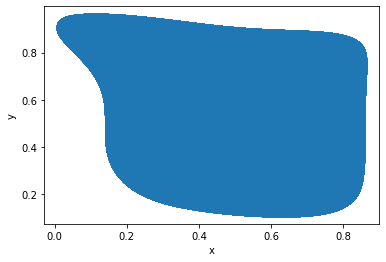

In [73]:
# Dibujemos la región
N=10000000
x = np.random.uniform(0,1,N)
y = np.random.uniform(0,1,N)
dentro_region = region(x,y)
plt.scatter(x[dentro_region], y[dentro_region])
plt.xlabel('x')
plt.ylabel('y')


In [74]:
# Resolver
n_terminos = np.logspace(1,7,7).astype(int)
tabla = pd.DataFrame(index=n_terminos, columns =['approx'])
for n in n_terminos:
    A_D_approx = montecarlo2(region,0,1,0,1,n)
    tabla.loc[n,'approx']=A_D_approx
tabla

,approx
10,0.5
100,0.59
1000,0.544
10000,0.5457
100000,0.54343
1000000,0.54759
10000000,0.546797
